In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
#reading data from the csv file
data= pd.read_csv("the-dataset/covid_19_data.csv")

In [3]:
#checking the number of rows and columns
data.shape

(10046, 8)

In [4]:
#checking the top 5 rows
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
#dropping the 1st and 5th column
data.drop("SNo", axis=1, inplace=True)
data.drop("Last Update", axis=1, inplace=True)

In [6]:
print(len(list(data['ObservationDate'].unique())))

68


In [7]:
#converting 'Date' column to datetime object
data['Date'] = pd.to_datetime(data['ObservationDate'])
#extracting dates from timestamps
data['Date_date']=data['Date'].apply(lambda x:x.date())

In [8]:
#preparing data for a time-series analysis
df_by_date=data.groupby(['Date_date']).sum().reset_index(drop=None)
df_by_date['daily_cases']=df_by_date.Confirmed.diff()
df_by_date['daily_deaths']=df_by_date.Deaths.diff()
df_by_date['daily_recoveries']=df_by_date.Recovered.diff()
print(df_by_date)

     Date_date  Confirmed   Deaths  Recovered  daily_cases  daily_deaths  \
0   2020-01-22      555.0     17.0       28.0          NaN           NaN   
1   2020-01-23      653.0     18.0       30.0         98.0           1.0   
2   2020-01-24      941.0     26.0       36.0        288.0           8.0   
3   2020-01-25     1438.0     42.0       39.0        497.0          16.0   
4   2020-01-26     2118.0     56.0       52.0        680.0          14.0   
5   2020-01-27     2927.0     82.0       61.0        809.0          26.0   
6   2020-01-28     5578.0    131.0      107.0       2651.0          49.0   
7   2020-01-29     6165.0    133.0      126.0        587.0           2.0   
8   2020-01-30     8235.0    171.0      143.0       2070.0          38.0   
9   2020-01-31     9925.0    213.0      222.0       1690.0          42.0   
10  2020-02-01    12038.0    259.0      284.0       2113.0          46.0   
11  2020-02-02    16787.0    362.0      472.0       4749.0         103.0   
12  2020-02-

In [9]:
#again the plot size
sns.set(rc={'figure.figsize':(10,8)})
#chanage the bgcolor to white
sns.set_style("white")
#make the legend and axis text a bit bigger
sns.set_context("talk")
#remove the axis splines
sns.despine()

<Figure size 720x576 with 0 Axes>

In [10]:
x = np.linspace(0,68, 68, endpoint = False) 

In [11]:
deaths = df_by_date['Deaths']
confirmed = df_by_date['Confirmed']
recovered = df_by_date['Recovered']

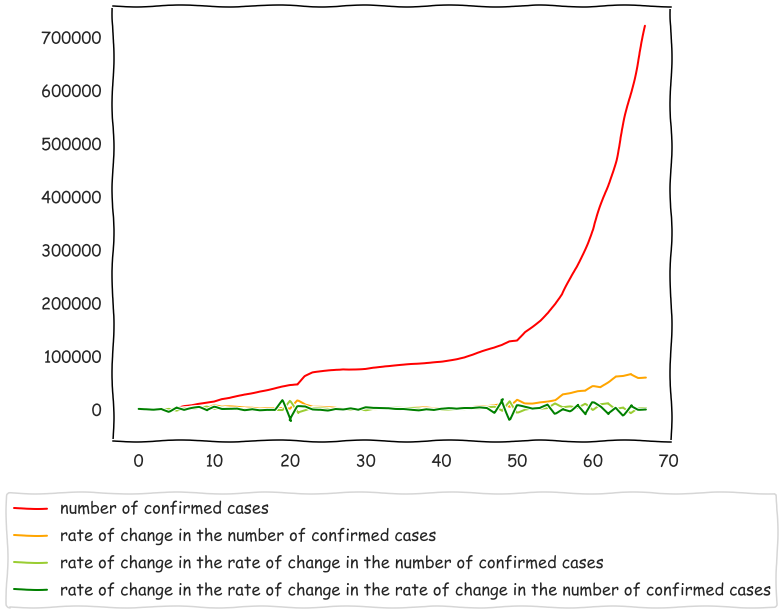

In [12]:
plt.xkcd()
plt.figure()
ax = plt.subplot(111)
#setting the log scales
ax.set(xscale="linear", yscale="linear")
#plotting two line plots for deaths and recoveries respectively

label = 'number of confirmed cases'
colors = ['red', 'orange', 'yellowgreen', 'green']

for i in range(0,4):
    plt.plot(confirmed, label = label, color = colors[i])
    #differentiation
    f = InterpolatedUnivariateSpline(x, confirmed, k=1)
    dfdx = f.derivative()
    confirmed = dfdx(x)
    label = 'rate of change in the ' + label

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=1, fancybox=True)
plt.show()